# **Intoduction to Financial Engineering Project**



Link to Colab : https://colab.research.google.com/drive/1Gm9qhdf1Fj2Rc648FbmGtoFQEqX7pvJR#scrollTo=JBJa_4J4um4a

Installation

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

### **Simple returns of 10 Risky assets for 3 months**


In [3]:
greens = ['LLOYDSME.BO', 'JSL.NS', 'MAHINDCIE.BO', 'JSLHISAR.NS', 'ZENSARTECH.BO', 'SONATSOFTW.BO', 'PAYTM.NS', 'SYMPHONY.NS', 'LINDEINDIA.NS', 'OIL.BO']
reds = ['TV', 'LYV', 'DIDIY', 'DNA', 'CHPT', 'ADBE', 'RUN', 'BEKE', 'COIN', 'ROKU']
big_ones = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'NFLX', 'META', 'NVDA', 'PYPL', 'V', 'MA']

asset_names = greens
assets = ['Lloyds Metals and Energy Limited', 'Jindal Stainless Limited', 'Mahindra CIE Automotive Limited', 'Jindal Stainless (Hisar) Limited', 'Zensar Technologies Limited', 'Sonata Software Limited', 'One97 Communications Limited', 'Symphony Limited', 'Linde India Limited', 'Oil India Limited']

start_date = '2022-11-23'
end_date = '2023-02-23'

prices = pd.DataFrame()
for ticker in asset_names:
    prices[ticker] = yf.download(ticker, start_date, end_date, interval='1d')['Close']

df_returns = prices.pct_change().dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df_returns

,LLOYDSME.BO,JSL.NS,MAHINDCIE.BO,JSLHISAR.NS,ZENSARTECH.BO,SONATSOFTW.BO,PAYTM.NS,SYMPHONY.NS,LINDEINDIA.NS,OIL.BO
Date,,,,,,,,,,
2022-11-24 00:00:00+05:30,-0.002017,-0.008295,0.032349,-0.008929,0.018700,0.009802,-0.024978,0.004063,0.002184,0.008178
2022-11-25 00:00:00+05:30,0.008663,0.018460,-0.003596,0.001625,-0.005278,0.041184,0.054636,0.032780,-0.003162,0.012928
2022-11-28 00:00:00+05:30,-0.028629,-0.009629,0.007561,0.000295,0.017762,0.055123,-0.007954,0.032591,0.000789,0.014514
2022-11-29 00:00:00+05:30,0.005894,-0.028596,-0.020126,-0.024469,0.006800,-0.007635,0.048537,-0.024359,0.008967,0.005673
2022-11-30 00:00:00+05:30,-0.028421,0.022667,-0.010618,0.013599,0.003377,0.013053,-0.004546,0.015105,-0.006934,0.003434
...,...,...,...,...,...,...,...,...,...,...
2023-02-16 00:00:00+05:30,0.013781,0.005078,-0.024170,0.016841,0.026912,0.019398,-0.017420,-0.001426,0.033586,0.052100
2023-02-17 00:00:00+05:30,-0.003219,0.026040,0.004748,0.004792,0.006410,0.012042,-0.003260,0.004951,-0.002805,0.001152
2023-02-20 00:00:00+05:30,-0.002871,0.014015,0.006897,0.009849,0.016298,0.082703,0.005823,0.004358,0.020559,-0.006518


In [5]:
mean_returns = df_returns.mean()
cov_matrix = df_returns.cov()

print(f'Mean Daily Returns :\n\n{mean_returns}')

Mean Daily Returns :

LLOYDSME.BO      0.007344
JSL.NS           0.006807
MAHINDCIE.BO     0.005262
JSLHISAR.NS      0.005830
ZENSARTECH.BO    0.004786
SONATSOFTW.BO    0.004515
PAYTM.NS         0.005287
SYMPHONY.NS      0.004700
LINDEINDIA.NS    0.003705
OIL.BO           0.004016
dtype: float64



### **Markowitz Efficient Frontier**

Markowitz Efficient Frontier Using Scipy's minimize function

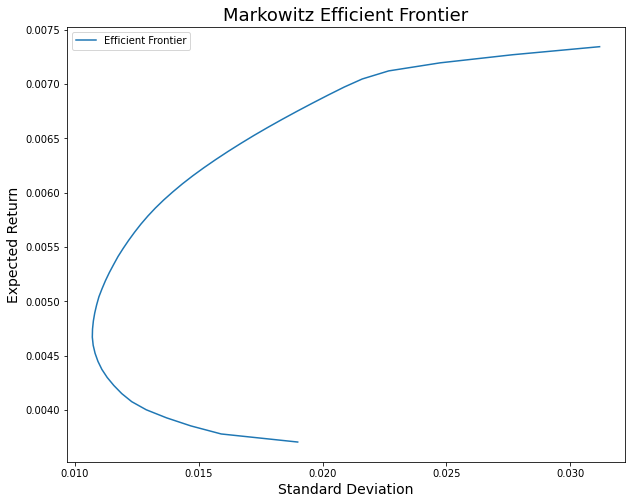

In [6]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    returns = np.dot(weights.T, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return volatility

def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std_dev

def markowitz_efficient_frontier(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    # Define the constraints
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Define the bounds
    bounds = tuple((0, 1) for i in range(num_assets))

    # Generate initial weights as an even distribution
    init_weights = np.array([1/num_assets for i in range(num_assets)])

    # Use scipy's minimize function to find the minimum volatility portfolio for each target return
    target_returns = np.linspace(mean_returns.min(), mean_returns.max(), num=50)
    efficient_weights = []
    for target_return in target_returns:
        # constraints += ({'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return},)
        constraints = [ {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                        {'type': 'eq', 'fun': lambda x: np.sum(df_returns.mean() * x) - target_return} ]
        
        result = minimize(portfolio_volatility, init_weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
        efficient_weights.append(result.x)

    efficient_weights = np.array(efficient_weights)
    efficient_frontier = pd.DataFrame({'Returns': target_returns, 'Volatility': [portfolio_volatility(weights, mean_returns, cov_matrix) for weights in efficient_weights]})

    return efficient_frontier, efficient_weights


efficient_frontier, efficient_weights = markowitz_efficient_frontier(mean_returns, cov_matrix)

# Plot the efficient frontier
plt.figure(figsize=(10, 8))
plt.title('Markowitz Efficient Frontier', fontsize=18)
plt.plot(efficient_frontier['Volatility'], efficient_frontier['Returns'], label='Efficient Frontier')
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.legend()
plt.show()

Markowitz Efficient Frontier Using Matrix Algebra (as studied in class)

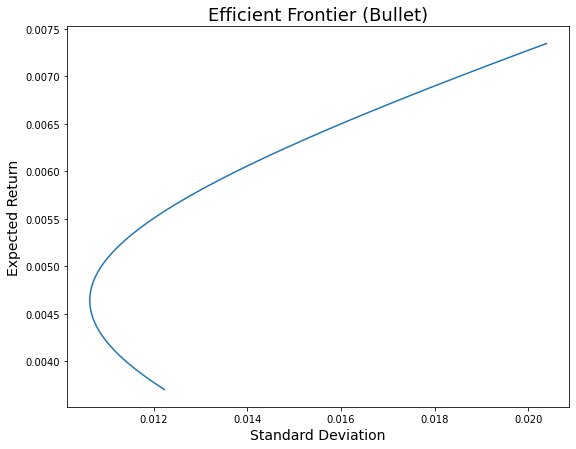

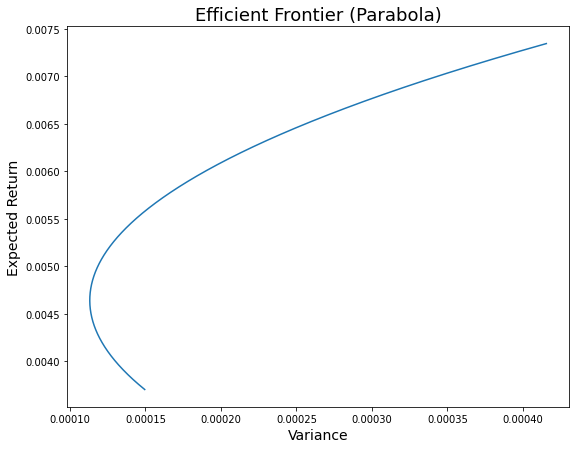

In [18]:
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), num=1000)
M = mean_returns
C = cov_matrix
C_inv = np.linalg.inv(C)
num_assets = len(df_returns.columns)
Ones = np.array([1] * num_assets)

def gimme_weights(M, C, C_inv, Ones, mu):
    vA = (Ones @ C_inv @ Ones.T)
    vB = (Ones @ C_inv @ M.T)
    vC = (M @ C_inv @ Ones.T)
    vD = (M @ C_inv @ M.T)

    mA = [[vA, -1], [vC, -mu]]
    mB = [[vB, -1], [vD, -mu]]
    mC = [[vA, vB], [vC, vD]]

    detA = np.linalg.det(mA)
    detB = np.linalg.det(mB)
    detC = np.linalg.det(mC)

    l1 = 2 * (detB / detC)
    l2 = -2 * (detA / detC)

    Weight = (l1 / 2) * (C_inv @ Ones.T) + (l2 / 2) * (C_inv @ M.T)

    return Weight.T 

efficient_weights = []
portfolio_volatility1 = []
portfolio_volatility2 = []
for target_return in target_returns:
    weights = gimme_weights(M, C, C_inv, Ones, target_return)
    efficient_weights.append(weights)
    sigma2 = (weights @ C @ weights.T)
    portfolio_volatility1.append(np.sqrt(sigma2))
    portfolio_volatility2.append(sigma2)

# Plot the efficient frontier (Bullet)
plt.figure(figsize=(9, 7))
plt.title('Efficient Frontier (Bullet)', fontsize=18)
plt.plot(portfolio_volatility1, target_returns)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.show()


# Plot the efficient frontier (Parabola)
plt.figure(figsize=(9, 7))
plt.title('Efficient Frontier (Parabola)', fontsize=18)
plt.plot(portfolio_volatility2, target_returns)
plt.xlabel('Variance', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.show()


### **Capital Market Line (CML)**


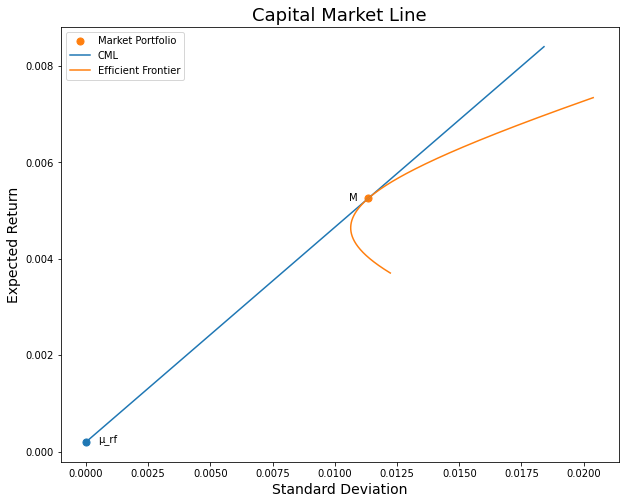

In [8]:
rf = 0.05/252   # 0.0001984126984126984             0.05 returns yearly, i.e. 0.05/252 per day as 252 trading days per year
M2 = np.append(M, rf)
C2 = np.append(C, np.zeros((C.shape[0], 1)), axis=1)
C2 = np.append(C2, np.zeros((1, C2.shape[1])), axis=0)
Ones2 = np.array([1] * (num_assets+1))

M = mean_returns
C = cov_matrix
C_inv = np.linalg.inv(C)
num_assets = M.shape[0]
Ones = np.array([1] * num_assets)

W2 = C_inv @ (M.T - rf*Ones.T)
k = Ones @ W2
W2 /= k

mu_M = M @ W2

sigma_M = np.sqrt(W2.T @ C @ W2)
sharpe = (mu_M - rf)/sigma_M


X = [0] + portfolio_volatility1[:899]
Y = [rf + sharpe*X[i] for i in range(len(X))]

market_x = 0
market_y = 0
market_weights = []
dist = 100000
for x in X:
    if x>0:
        ix = portfolio_volatility1.index(x)
        y = rf + sharpe*x
        if abs(target_returns[ix]-y)<dist:
            dist = abs(target_returns[ix]-y)
            market_x = x
            market_y = y
            market_weights = efficient_weights[ix]

plt.figure(figsize=(10, 8))
plt.title('Capital Market Line', fontsize=18)

plt.scatter([0], [rf], s=50)
plt.text(0.0005, rf, "µ_rf")

plt.scatter([market_x], [market_y], s=50, label='Market Portfolio')
plt.text(market_x*0.93, market_y*0.99, "M")

plt.plot(X, Y, label='CML')
plt.plot(portfolio_volatility1, target_returns, label='Efficient Frontier')

plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Expected Return', fontsize=14)
plt.legend()
plt.show()

- The capital market line (CML) represents portfolios that optimally combine risk and return.
- The slope of the CML is the Sharpe ratio of the market portfolio and it is tangent to the effecient frontier.
- The intercept point of CML and efficient frontier would result in the most efficient portfolio called the ***Tangency Portfolio*** or ***Market Portfolio***.

In [9]:
print(f'Risk Free Rate : {rf:.6f} (which is 0.05/252 daily return i.e. 0.05 yearly returns as there are 252 trading days)')
print(f'Sharpe Ratio : {sharpe:.6f}')

Risk Free Rate : 0.000198 (which is 0.05/252 daily return i.e. 0.05 yearly returns as there are 252 trading days)
Sharpe Ratio : 0.445732


In [17]:
df_weights = pd.DataFrame({ assets[i]:[market_weights[i], mean_returns[i]] for i in range(num_assets)})
df_weights.set_index(pd.Index(['Weights', 'Mean Returns']), inplace=True)

print(f'\nMarket Portfolio Standard Deviation : {market_x}')
print(f'Market Portfolio Risk : {(market_x**2)*100:.4f} %')
print(f'Market Portfolio Expected Daily Return : {market_y*100:.4f} %\n')

print('Market Portfolio Weights :\n')

df_weights


Market Portfolio Standard Deviation : 0.0113492811861131
Market Portfolio Risk : 0.0129 %
Market Portfolio Expected Daily Return : 0.5257 %

Market Portfolio Weights :



,Lloyds Metals and Energy Limited,Jindal Stainless Limited,Mahindra CIE Automotive Limited,Jindal Stainless (Hisar) Limited,Zensar Technologies Limited,Sonata Software Limited,One97 Communications Limited,Symphony Limited,Linde India Limited,Oil India Limited
Weights,0.096270,0.169770,0.093706,0.030842,0.128448,0.078824,-0.021308,0.275603,0.081949,0.065895
Mean Returns,0.007344,0.006807,0.005262,0.005830,0.004786,0.004515,0.005287,0.004700,0.003705,0.004016


### **Security Market Line (SML) for 3 assets**

In [11]:
n_assets = 3
new_df_returns = df_returns.iloc[:, :n_assets]              # we take first 3 assets
new_cov_matrix = new_df_returns.cov()
new_M = new_df_returns.mean()
new_target_returns = np.linspace(new_M.min(), new_M.max(), num=50)
new_C = new_df_returns.cov()
new_C_inv = np.linalg.inv(new_C)
new_Ones = np.array([1] * n_assets)
eK = np.array([0] * n_assets)

new_W = new_C_inv @ (new_M.T - rf*new_Ones.T)
new_k = new_Ones @ new_W
new_W /= new_k

mu_M = new_M @ new_W

# calculating beta for 3 securities :
Betas = []
for i in range(n_assets):
    below = new_W.T @ new_C @ new_W
    eK = np.array([0] * n_assets)
    eK[i] += 1
    upper = new_W.T @ new_C @ eK
    Betas.append(upper/below)

In [12]:
#slope of Security maarket line
slope = mu_M - rf
print(slope)

0.006403344206123467


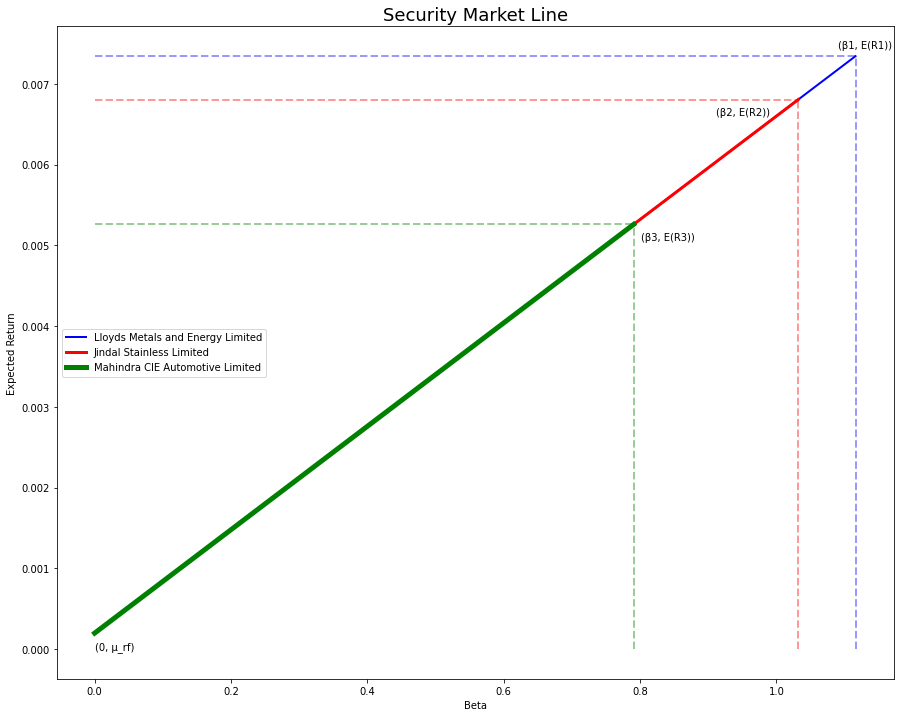

In [13]:
point1 = [0, rf]
point2 = [Betas[0], slope*Betas[0] + rf]
point3 = [Betas[1], slope*Betas[1] + rf]
point4 = [Betas[2], slope*Betas[2] + rf]

x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 = [point1[0], point3[0]]
y_values2 = [point1[1], point3[1]]

x_values3 = [point1[0], point4[0]]
y_values3 = [point1[1], point4[1]]

plt.figure(figsize=(15, 12))
plt.title('Security Market Line', fontsize=18)
plt.plot(x_values1, y_values1, 'blue', linestyle="-", linewidth=2, label = assets[0])
plt.text(point2[0] - 0.025, point2[1] + 0.0001, "(β1, E(R1))")

plt.plot(x_values2, y_values2, 'red', linestyle="-", linewidth=3, label = assets[1])
plt.text(point3[0] - 0.12, point3[1] - 0.0002, "(β2, E(R2))")

plt.plot(x_values3, y_values3, 'green', linestyle="-", linewidth=5, label = assets[2])
plt.text(point1[0], point1[1] - 0.0002, "(0, µ_rf)")
plt.text(point4[0] + 0.01, point4[1]-0.0002, "(β3, E(R3))")

plt.plot([Betas[0], Betas[0]], [0, point2[1]], 'blue', linestyle = "--", linewidth=2, alpha=0.4)
plt.plot([Betas[1], Betas[1]], [0, point3[1]], 'red', linestyle = "--", linewidth=2, alpha=0.4)
plt.plot([Betas[2], Betas[2]], [0, point4[1]], 'green', linestyle = "--", linewidth=2, alpha=0.4)

plt.plot([0, Betas[0]], [point2[1], point2[1]], 'blue', linestyle = "--", linewidth=2, alpha=0.4)
plt.plot([0, Betas[1]], [point3[1], point3[1]], 'red', linestyle = "--", linewidth=2, alpha=0.4)
plt.plot([0, Betas[2]], [point4[1], point4[1]], 'green', linestyle = "--", linewidth=2, alpha=0.4)
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.show()

- We see that `β1 > 1` as well as `β2 > 1` which means first two assets are aggresive with respect to portfolio.

- And similarly `β3 < 1` hence the third one is defensive asset.  